# Efficient Frontier Generation

<a href="https://colab.research.google.com/github/warwickdatascience/subject-examples/blob/master/python/finance/finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

### Problem Statement

Suppose you have a fixed amount of money to split up and invest in a range of equities. You know the expected returns of the equities as well as their associated risks, captured in an expected return vector and covariance matrix respectively. Each combination of investments (portfolio) will have a corresponding expected return and risk. Naturally, our goal is to maximise our return for any given level of risk. A simple way of doing this is to randomly generate possible portfolios and evaluate their expected returns and risks. Once we have done this a large number of times, we can plot the results to visualise what returns are possible for various risk levels and use this to decide on an optimal portfolio for our risk tolerance. The curve given by selecting the maximal expected return for each risk tolerance is known as the efficient frontier.

### Resources

In this example, we use simulated data (i.e. we randomly generate an expected return vector and covariance matrix) though it would easily be possible to link this approach to real data sources using relevant financial APIs.

### Non-course Techniques

We use a package called `matplotlib` to create the final visualisation, but all other code is taken from the course.

This notebook takes advantage of many of the techniques showcased in the additional notes of the course. This could be avoided but would make the code much longer and messier.

## Setup

We begin by importing any relevant modules and setting the graphical parameters for `matplotlib`.

In [9]:
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
mpl.rcParams.update({'font.size': 12})
mpl.rcParams.update({'figure.facecolor': 'white'})

This notebook is parameterised by the variables defined below; the larger the number of equities, the more simulations will be needed to be confident that the optimal solutions have been found. This, however, will increase the time needed to run the notebook.

In [11]:
N = 4  # number of equities
P = 10 ** 6  # number of simulations
RFR = 0.5  # risk-free rate
SEED = 1729  # random seed used for reproducibility

We start by generating a random expected return vector and covariance matrix. The maths behind this is a bit complicated as we need to gaurantee that the covariance matrix is valid, but we could have instead used real data for this notebook, in which case we wouldn't have to worry about this.

In [12]:
random.seed(SEED)
expected_returns = [random.gauss(0, 1) for __ in range(N)]
A = [[random.gauss(0, 1) for _2 in range(N)] for _1 in range(N)]
cov_matrix = [[sum(A[i][k] * A[j][k] for k in range(N))  # matmul
               for j in range(N)] for i in range(N)]

## Simulation

We first create a function to calculate the expected return, risk, and [Sharpe ratio](https://www.investopedia.com/terms/s/sharperatio.asp) of any portfolio. We specify the portfolio by passing in a list of weights. For example, the list `[0.2, 0.8]` would correspond to investing $20\%$ in the first equity and $80\%$ in the other.

In [13]:
def portfolio_performance(weights, expected_returns, cov_matrix, risk_free_rate):
    returns = sum(w * r for w, r in zip(weights, expected_returns))
    std = math.sqrt(sum(sum([weights[i] * cov_matrix[i][j] * weights[j]
                             for j in range(N)])
                        for i in range(N)))
    sharpe = (returns - risk_free_rate) / std
    return std, returns, sharpe

We then create a function to generate `P` random portfolios and use the above function to calculate their performances. This gives rise to lists of risks, returns, and Sharpe ratios, which are then returned.

In [14]:
def random_portfolios(P, expected_returns, cov_matrix, risk_free_rate):
    stds = []; rets = []; sharpes = []
    for __ in range(P):
        weights = [random.random() for __ in range(N)]
        weights = [w / sum(weights) for w in weights]
        std, ret, sharpe = portfolio_performance(weights, expected_returns,
                                         cov_matrix, risk_free_rate)
        stds.append(std); rets.append(ret); sharpes.append(sharpe)
    return stds, rets, sharpes

Finally, we run the simulation.

In [19]:
x, y, c = random_portfolios(P, expected_returns, cov_matrix, RFR)

## Visualisation

We can then visualise the performances of the simulated portfolios using `matplotlib`.

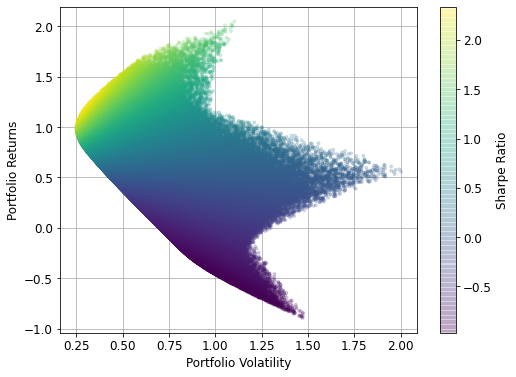

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x, y, c=c, s=8, alpha=0.2)
plt.colorbar().set_label('Sharpe Ratio')
ax.set_xlabel('Portfolio Volatility')
ax.set_ylabel('Portfolio Returns')
ax.grid()
ax.set_axisbelow(True)
plt.show()